In [1]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv(r"Demographic.csv")
#type(df0) # gives pandas.core.frame.DataFrame

In [3]:
df0.describe()

,SortOrder,LocID,SDMX_code,LocTypeID,ParentID,VarID,Time,TPopulation1Jan,TPopulation1July,TPopulationMale1July,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
count,4110.000000,4110.000000,3502.000000,4110.000000,4110.000000,4110.0,4110.000000,4.110000e+03,4.083000e+03,4.083000e+03,...,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,16.245255,1289.454015,429.313535,8.400973,1523.473479,2.0,2025.393431,1.849419e+06,1.850936e+06,9.262086e+05,...,277.060134,212.337429,109.079911,126.219689,91.411876,189.444494,220.635401,157.055127,-260.537889,0.186553
std,8.935680,534.887632,321.088860,4.280366,477.569756,0.0,43.939522,2.390107e+06,2.389882e+06,1.196907e+06,...,170.251819,166.735960,81.932228,85.632545,78.907089,115.910544,120.866518,111.620773,1205.039303,5.362997
min,1.000000,108.000000,1.000000,1.000000,0.000000,2.0,1950.000000,6.136100e+01,6.233400e+01,3.094300e+01,...,20.312800,8.922300,6.582700,9.351800,3.720300,13.903400,19.296000,8.329900,-8636.202000,-116.296000
25%,8.000000,903.000000,108.000000,5.000000,910.000000,2.0,1987.000000,8.520341e+04,8.536703e+04,4.238015e+04,...,147.690100,86.930850,49.072750,62.326750,34.677400,101.733950,127.614875,73.418675,-622.586250,-0.513000
50%,16.000000,1502.000000,432.000000,12.000000,1803.000000,2.0,2025.000000,1.027465e+06,1.027001e+06,5.075376e+05,...,233.923700,147.993400,80.143400,102.637700,58.557700,158.911200,199.625500,118.077450,-159.147000,-0.249500
75%,24.000000,1830.000000,747.000000,12.000000,1828.000000,2.0,2063.000000,2.375428e+06,2.378382e+06,1.195876e+06,...,375.862950,305.548500,146.387750,166.539800,125.785000,256.161400,292.846275,218.501125,0.900000,0.106750
max,32.000000,1836.000000,914.000000,13.000000,1840.000000,2.0,2101.000000,1.043105e+07,1.043093e+07,5.192851e+06,...,904.652900,837.557700,659.526500,717.429600,595.007200,773.870800,820.800900,720.468800,7674.484000,97.054000


In [4]:
df0.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [5]:
df0.shape

(4110, 67)

In [8]:
#df0.isnull()
df0.isnull().sum()

SortOrder           0
LocID               0
Notes            2286
ISO3_code        3648
ISO2_code        3648
                 ... 
Q1560              27
Q1560Male          28
Q1560Female        28
NetMigrations      28
CNMR               28
Length: 67, dtype: int64

In [17]:
# cannot use df0.dropna() as every row is dropped 
df1=df0.dropna()
df1.shape[0] - df0.shape[0] # gives number of rows deleted

-4110

In [24]:
df1=df0.fillna(0) # fill null values with 0

In [23]:
#df1.CNMR.mean() - df1['CNMR'].mean() # bith df1.CNMR.mean() and df1['CNMR].mean() are same
df0['CNMR'].mean() - df1['CNMR'].mean()
# the mean changes because we gave 0 to null values

0.0012709234417077886

In [25]:
df1.isnull().sum()
# df0.isnull().sum().sum()

SortOrder        0
LocID            0
Notes            0
ISO3_code        0
ISO2_code        0
                ..
Q1560            0
Q1560Male        0
Q1560Female      0
NetMigrations    0
CNMR             0
Length: 67, dtype: int64

In [36]:
# copy the value above null in the same column and paste it instead of null value
df2 = df0.fillna(method = 'pad')
df2.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [29]:
# method does not work if above value is also null
df2.isnull().sum()

SortOrder           0
LocID               0
Notes             152
ISO3_code        3648
ISO2_code        3648
                 ... 
Q1560               0
Q1560Male           0
Q1560Female         0
NetMigrations       0
CNMR                0
Length: 67, dtype: int64

In [32]:
#filling null values with next backword fill row values
df3 = df0.fillna(method = 'bfill')
df3.isnull().sum()

SortOrder          0
LocID              0
Notes            918
ISO3_code          0
ISO2_code          0
                ... 
Q1560              0
Q1560Male          1
Q1560Female        1
NetMigrations      1
CNMR               1
Length: 67, dtype: int64

In [34]:
df3.tail()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
4105,32,232,NaN,ERI,ER,232.0,4,Country/Area,910,Eritrea,...,746.0940,687.8379,368.3388,387.1850,349.9712,516.8713,546.8742,488.1540,0.150,0.180
4106,32,232,NaN,ERI,ER,232.0,4,Country/Area,910,Eritrea,...,743.3417,683.8464,366.5763,386.1426,347.4256,514.8640,545.7055,485.2114,0.171,0.202
4107,32,232,NaN,ERI,ER,232.0,4,Country/Area,910,Eritrea,...,740.0084,679.7674,364.8201,384.7451,345.2502,512.8264,544.1044,482.6541,0.212,0.246
4108,32,232,NaN,ERI,ER,232.0,4,Country/Area,910,Eritrea,...,735.1574,673.3794,361.1701,381.6730,340.9621,508.5469,540.5705,477.5461,0.274,0.312
4109,32,232,NaN,ERI,ER,232.0,4,Country/Area,910,Eritrea,...,730.4906,670.4304,359.6351,379.1738,340.3788,506.7850,NaN,NaN,NaN,NaN


In [44]:
#mean of some specific columns
df0[['Q0060Male', 'Q0060Female','Q1560Male', 'Q1560Female'  ]].mean()

Q0060Male      277.060134
Q0060Female    212.337429
Q1560Male      220.635401
Q1560Female    157.055127
dtype: float64

In [43]:
# mena of every column
df0.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SortOrder          16.245255
LocID            1289.454015
SDMX_code         429.313535
LocTypeID           8.400973
ParentID         1523.473479
                    ...     
Q1560             189.444494
Q1560Male         220.635401
Q1560Female       157.055127
NetMigrations    -260.537889
CNMR                0.186553
Length: 61, dtype: float64

In [84]:
# fillna with mean for non-object type columns
df4 = df0.fillna(value = (df0.dtypes!="object").mean())
df4.head()
# why is Notes column changed having numbers though dtypes is object

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [83]:
# fillna with mode/median for non-object type columns
df4 = df0.fillna(value = (df0.dtypes!="object").median())
df4.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,900,1.0,1.0,1.0,1.0,1,World,0,World,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,900,1.0,1.0,1.0,1.0,1,World,0,World,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,900,1.0,1.0,1.0,1.0,1,World,0,World,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,900,1.0,1.0,1.0,1.0,1,World,0,World,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,900,1.0,1.0,1.0,1.0,1,World,0,World,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [99]:
# remove column if all values are NULL
df4.dropna(how='all',axis=1).head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,900,0.910448,0.910448,0.910448,1.0,1,World,0,World,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [59]:
df4.dtypes

SortOrder          int64
LocID              int64
Notes             object
ISO3_code         object
ISO2_code         object
                  ...   
Q1560            float64
Q1560Male        float64
Q1560Female      float64
NetMigrations    float64
CNMR             float64
Length: 67, dtype: object

In [56]:
df0.shape[1] - df4.shape[1]

0

In [89]:
# find the inter quartile range IQR
Q1 = df4['Q1560Male'].quantile(0.25)
Q3 = df4.Q1560Male.quantile(0.75)
IQR = (Q3-Q1)
IQR

164.94045

In [86]:
# df5 has only rows with outliers of Q1560Male 
lower_limit = Q1-1.5*(IQR)
upper_limit = Q3+1.5*(IQR)
df5 = df4[(df4['Q1560Male']<lower_limit)|(df4['Q1560Male']>upper_limit)]
df5.shape

(14, 67)

In [96]:
# df6 has rows excluding outlier rows of df4['Q1560Male']
df6 = df4[(df4['Q1560Male']>lower_limit)&(df4['Q1560Male']<upper_limit)]
df6.shape

(4096, 67)

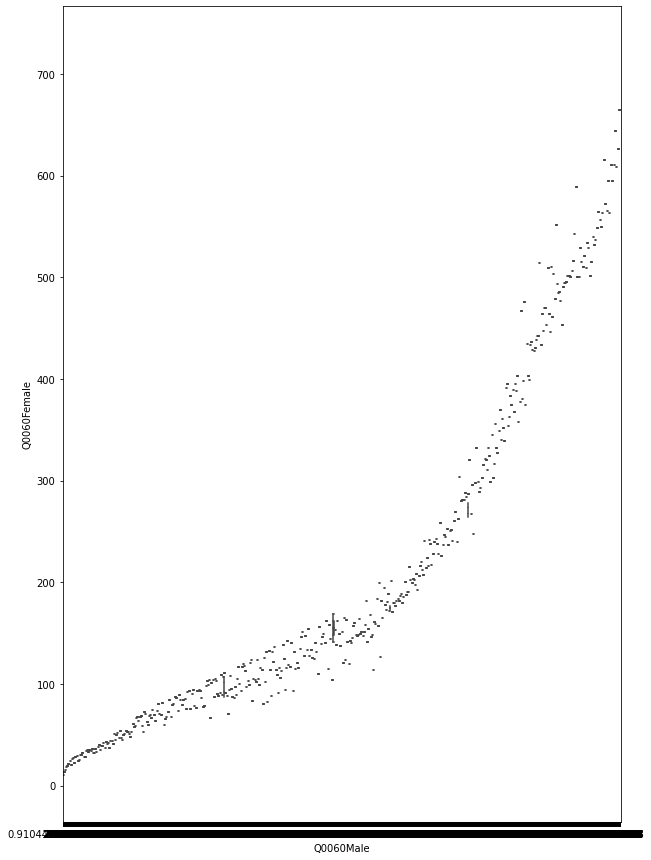

In [103]:
plt.figure(figsize=(10,15))
sns.boxplot(data = df6, x = "Q0060Male", y = "Q0060Female")

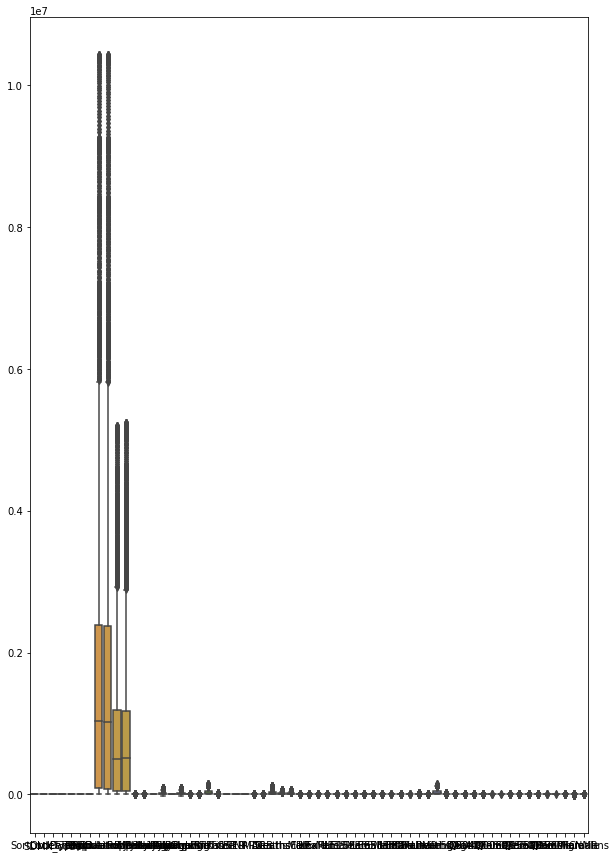

In [102]:
plt.figure(figsize=(10,15))
sns.boxplot(data = df6)